In [50]:
# 예제
#1. drinks.csv파일 로드
#2. 결측치 확인
#3. 데이터프레임 정보 출력
#4. continent 컬럼에서 결측치 존재하면 결측치를 'OT'로 대체
#5. continent 별 spirit_servings컬럼의 평균, 최소, 최대, 합계를 출력
#6. continent 별 total_litres_or_pure_alcohol이 
#   총 국가의 total_litres_or_pure_alcohol 평균보다 높은 continent가 어디인지 출력
#7. 국가별 술 소비량 대비 알콜 비율 컬럼 추가

In [51]:
import pandas as pd

In [52]:
drinks = pd.read_csv("./csv/drinks.csv")
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [53]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [54]:
drinks.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [61]:
# 결측치 대체 -> fillna(n), df.loc[결측치조건,"결측치가있는컬럼"]="대체값"
flg_null = drinks["continent"].isna()
drinks.loc[flg_null,"continent"]="OT"

# "OT"로 대체한 후의 각 continent별 데이터 수 확인(잘 바뀌는지)하고 실제로 반영해줌
drinks["continent"].fillna("OT").value_counts()
drinks["continent"] = drinks["continent"].fillna("OT")


In [88]:
continent_group1 = drinks[["spirit_servings","continent"]].groupby("continent").agg(["mean","min","max","sum"])
continent_group1

# pd.pivot_table(
#     drinks,
#     index="continent",
#     values="spirit_servings",
#     aggfunc=["mean","min","max","sum"]
# )

spirit_servings               
                     mean min  max   sum
continent                               
AF              16.339623   0  152   866
AS              60.840909   0  326  2677
EU             132.555556   0  373  5965
OC              58.437500   0  254   935
OT             165.739130  68  438  3812
SA             114.750000  25  302  1377

In [89]:
# 대륙별 알콜소비량 평균
continent_group2 = drinks[["total_litres_of_pure_alcohol","continent"]].groupby("continent").mean()
continent_group2

,total_litres_of_pure_alcohol
continent,
AF,3.007547
AS,2.170455
EU,8.617778
OC,3.381250
OT,5.995652
SA,6.308333


In [86]:
mean_total_litres_of_pure_alcohol = drinks["total_litres_of_pure_alcohol"].mean()

In [90]:
over_mean_group = continent_group2["total_litres_of_pure_alcohol"] > drinks["total_litres_of_pure_alcohol"].mean()
over_mean_group = over_mean_group.to_frame()
over_mean_group

,total_litres_of_pure_alcohol
continent,
AF,False
AS,False
EU,True
OC,False
OT,True
SA,True


In [94]:
# 국가별 술 소비량 변수 생성
drinks["total_servings"] = drinks["beer_servings"]+drinks["spirit_servings"]+drinks["wine_servings"]
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319


In [98]:
# 술 소비량 대비 알콜 비율 변수 생성
# 알콜 소비량 / 술 소비량 * 100
# 분모값이 0인 경우 결측치 NaN 반환하므로 fillna(n) 이용해 결측치 채워주기

drinks["alcohol_rate"] = (drinks["total_litres_of_pure_alcohol"] / drinks["total_servings"] * 100).fillna(0)

In [130]:
# 가장 독한 술을 먹는 나라는??

# _sorted = drinks.sort_values("alcohol_rate", ascending=False).reset_index(drop=True)
_sorted = drinks.sort_values("alcohol_rate", ascending=False, ignore_index=True)
_sorted.iloc[10]

country                            Sudan
beer_servings                          8
spirit_servings                       13
wine_servings                          0
total_litres_of_pure_alcohol         1.7
continent                             AF
total_servings                        21
alcohol_rate                    8.095238
Name: 10, dtype: object

In [125]:
_sorted.loc[_sorted["country"]=="South Korea"]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
14,South Korea,140,16,9,9.8,AS,165,5.939394


In [131]:
_sorted.loc[_sorted["country"]=="North Korea"]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
181,North Korea,0,0,0,0.0,AS,0,0.0


#### drinks 시각화

In [135]:
import matplotlib.pyplot as plt

5.93939393939394


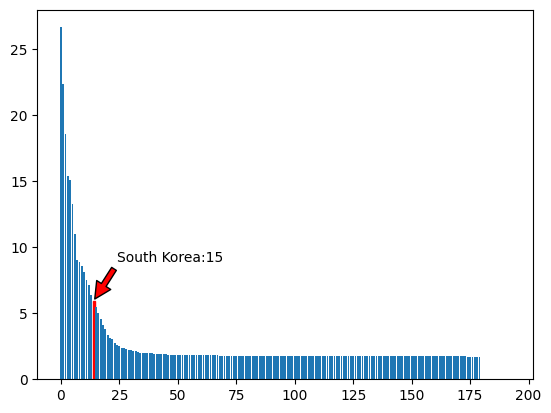

In [145]:
# 모든 국가를 그래프로 그리고 우리나라 찍기

x = list(range(len(_sorted)))
y = _sorted["alcohol_rate"]

country_list = _sorted["country"].to_list()

bar_list = plt.bar(x,y)

korea_rank = country_list.index("South Korea")
korea_alcohol_rate = _sorted.loc[_sorted["country"]=="South Korea", "alcohol_rate"].values[0]

print(korea_alcohol_rate)

# 그래프 커스텀

# 막대 색상 변경
bar_list[korea_rank].set_color('r')

# 글씨, 화살표 추가
plt.annotate("South Korea:" + str(korea_rank + 1), 
            xy = (korea_rank, korea_alcohol_rate),
            xytext = (korea_rank + 10, korea_alcohol_rate +3),
            arrowprops = dict(facecolor = 'r', shrink = 0.05))


plt.show()

#### continent_group 시각화

In [80]:
# 막대그래프 (한 화면에 4개->subplot()사용)
# bar() 그릴 때는 x,y 필수
x = continent_group1.index
# y1 = continent_group1["spirit_servings","mean"]
y1 = continent_group1["spirit_servings"]["mean"]
y2 = continent_group1["spirit_servings"]["min"]
y3 = continent_group1["spirit_servings"]["max"]
y4 = continent_group1["spirit_servings"]["sum"]

# continent_group1["spirit_servings"] -> 상위 컬럼 하나 걷어낼 수 있음
# continent_group1["spirit_servings"]["mean"] 으로도 접근 가능

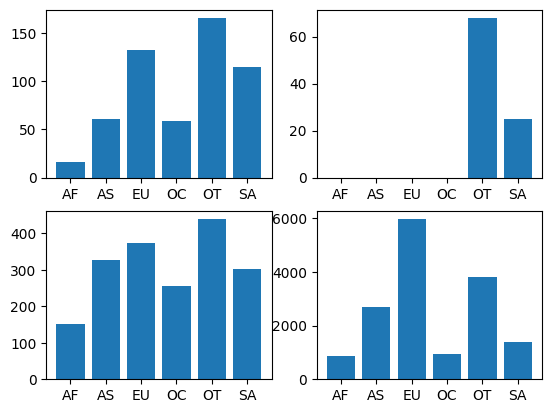

In [81]:
# subplot(행의수,열의수,영역지정)

plt.subplot(2,2,1)
plt.bar(x,y1)

plt.subplot(2,2,2)
plt.bar(x,y2)

plt.subplot(2,2,3)
plt.bar(x,y3)

plt.subplot(2,2,4)
plt.bar(x,y4)

plt.show()